<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/13_6_Challenge_Data_Cleaning_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Validation Challenge

To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
challenge = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\WELLCOME_APCspend2013_forThinkful.csv')

In [0]:
challenge.head(10)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [0]:
challenge['Publisher'].count()

2127

In [0]:
#view all publishers, strip white space and make everything lowercase
challenge['Publisher'] = challenge['Publisher'].apply(lambda x: x.strip())
challenge['Publisher'] = challenge['Publisher'].str.lower()
print(challenge['Publisher'].unique())

['cup' 'acs' 'acs (amercian chemical society) publications'
 'acs publications' 'aga institute' 'ambsb'
 'american association of immunologists' 'american chemical society'
 'american chemical society publications'
 'american college of chest physicians' 'american physiological society'
 'american psychiatric association' 'american psychiatric publishing'
 'american psychological association' 'american public health association'
 'american soc for biochemistry and molecular biology'
 'american society for biochemistry and molecular biolgy'
 'american society for biochemistry and molecular biology'
 'american society for investigative pathology'
 'american society for microbiology' 'american society for nutrition'
 'american society of haematology' 'american society of hamatology'
 'american society of hematology'
 'american society of human genetics (elsevier)'
 'american society of microbiology'
 'american speech-language-hearing association' 'asbmb' 'asbmb cadmus'
 'asbmb/cadmus' 'as

In [0]:
print(challenge['Publisher'].value_counts())

elsevier                                                                             399
public library of science                                                            278
wiley                                                                                148
oxford university press                                                               85
springer                                                                              82
biomed central                                                                        60
wiley-blackwell                                                                       56
oup                                                                                   56
nature publishing group                                                               49
asbmb                                                                                 46
bmc                                                                                   26
bmj                  

In [0]:
#are there any null values?
challenge.isnull().any()

PMID/PMCID                                              True
Publisher                                              False
Journal title                                           True
Article title                                          False
COST (£) charged to Wellcome (inc VAT when charged)    False
dtype: bool

In [0]:
#how many null values?
challenge.isnull().sum()

PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

In [0]:
challenge['Publisher'].nunique()

254

# Dictionary approach

In [0]:
#build a dictionary with key words as text in raw material, and value as text needed

dict = {'acs' : 'american chemical society', 
        'acs (amercian chemical society) publications' : 'american chemical society',
        'acs publications':'american chemical society', 
        'american chemical society publications' : 'american chemical society',
        'american society of human genetics (elsevier)':'elsevier',
        'elseveier science':'elsevier',
        'elsevier (cell press)':'elsevier',
        'elsevier / cell science':'elsevier', 
        'elsevier/Cell Press':'elsevier', 
        'elseveier':'elsevier',
        'elsevier ltd':'elsevier',
        'elsevier b.v.':'elsevier',
        'plos':'public library of science',
        'plos (public library of science)':'public library of science', 
        'plos public library of science':'public library of science',
        'wiley':'john wiley & sons', 
        'john wiley & sons inc': 'john wiley & sons', 
        'john wiley & sons ltd':'john wiley & sons',
        'wiley subscription services':'john wiley & sons', 
        'wiley blackwell':'john wiley & sons', 
        'wiley & son':'john wiley & sons',
        'wiley online library':'john wiley & sons', 
        'wiley subscription services inc.':'john wiley & sons', 
        'wiley-blackwell':'john wiley & sons',
        'wiley-vch':'john wiley & sons', 
        'wiley subscription services inc':'john wiley & sons', 
        'wiley blackwell':'john wiley & sons',
        'wliey-blackwell':'john wiley & sons', 
        'wiley':'john wiley & sons', 
        'wiley subscription services  inc.':'john wiley & sons',
        'john wiley':'john wiley & sons',
        'john wiley & sons, inc.': 'john wiley & sons',
        'john wiley and sons':'john wiley & sons',
        'john wiley and sons ltd':'john wiley & sons',
        'wiley subscription serviices inc':'john wiley & sons',
        'wiley vch':'john wiley & sons',
        'wiley/blackwell':'john wiley & sons',
        'wiley-blackwell, john wiley & sons':'john wiley & sons',
        'blackwell publishing ltd/wiley':'john wiley & sons',
        'oxford journals':'oxford university press',
        'oup':'oxford university press',
        'oxford journals (oup)':'oxford university press',
        'oxford univ press':'oxford university press',
        'oxford university press (oup)':'oxford university press',
        'oxford univesity press':'oxford university press',
        'humana press (springer imprint)':'springer',
        'springer-verlag gmbh':'springer',
        'springer science + business media':'springer',
        'springer verlag':'springer',
        'springer-veriag gmbh':'springer',
        'springer-verlag gmbh & ci':'springer',
        'springer-verlag gmbh, heidelberger platz 3, d-14197 berlin':'springer',
        'biomed central limited':'biomed central',
        'biomed central ltd':'biomed central',
        'bmc':'biomed central',
        'asbmb':'american society for biochemistry and molecular biology',
        'bmj':'bmj publishing group',
        'bmj group':'bmj publishing group',
        'portland press ltd':'portland press',
        'pnas':'proceedings of the national academy of sciences',
        'pnas author publication':'proceedings of the national academy of sciences',
        'proceedings of the national academy of sciences (pnas)':'proceedings of the national academy of sciences',
        'cup':'cambridge university press'}
clean_df = challenge.replace({'Publisher' : dict})
clean_df['Publisher'].value_counts()

elsevier                                                       408
public library of science                                      307
john wiley & sons                                              270
oxford university press                                        167
biomed central                                                  95
springer                                                        93
american society for biochemistry and molecular biology         65
bmj publishing group                                            50
nature publishing group                                         49
american chemical society                                       30
cambridge university press                                      28
nature                                                          25
frontiers                                                       23
portland press                                                  22
royal society                                                 

As seen above, the top 5 publishers include: Elsevier, Public Library of Science, John Wiley & Sons, Oxford University Press, and BioMed Central.

In [0]:
#calculate the mean, median, standard deviation for the cost per article of each of the top 5 journals

In [0]:
#rename columns of cleaned dataframe
clean_df.columns = ['PMID/PMCID', 'Publisher', 'Journal Title', 'Article Title', 'Cost']

In [0]:
#check for cost null values, and data types
null_cost = clean_df[clean_df['Cost'].isnull()]
print(null_cost)
print(clean_df.dtypes)

Empty DataFrame
Columns: [PMID/PMCID, Publisher, Journal Title, Article Title, Cost]
Index: []
PMID/PMCID       object
Publisher        object
Journal Title    object
Article Title    object
Cost             object
dtype: object


In [0]:
#convert the cost column to a float by deleting the dollar and pound symbols
#using the average exchange rate of dollars to pounds between years 2012 and 2013, convert the dollar values to pounds
clean_df['Cost'] = clean_df['Cost'].apply(lambda x: x.replace('£', '') if isinstance(x, str) and '£' in x else x)
clean_df['Cost'] = clean_df['Cost'].apply(lambda x: float(x.replace('$', ''))*0.6353 if isinstance(x, str) and '$' in x else x)
clean_df['Cost'] = pd.to_numeric(clean_df['Cost'])
print(clean_df.dtypes)

PMID/PMCID        object
Publisher         object
Journal Title     object
Article Title     object
Cost             float64
dtype: object


In [0]:
#find the mean cost of the top 5 publishers
mean = clean_df.groupby('Publisher')['Cost'].mean()
mean_top_5 = mean[['elsevier', 'public library of science', 'john wiley & sons', 'oxford university press', 'biomed central']]
print(mean_top_5)

Publisher
elsevier                     26880.723701
public library of science    50551.879848
john wiley & sons            17532.888444
oxford university press      19775.350240
biomed central               22329.838250
Name: Cost, dtype: float64


In [0]:
#find the median cost of the top 5 publishers
median = clean_df.groupby('Publisher')['Cost'].median()
median_top_5 = median[['elsevier', 'public library of science', 'john wiley & sons', 'oxford university press', 'biomed central']]
print(median_top_5)

Publisher
elsevier                     2351.795
public library of science    1023.410
john wiley & sons            2009.945
oxford university press      2040.000
biomed central               1314.600
Name: Cost, dtype: float64


In [0]:
#find the standard deviation of cost of the top 5 publishers
std = clean_df.groupby('Publisher')['Cost'].std()
std_top_5 = std[['elsevier', 'public library of science', 'john wiley & sons', 'oxford university press', 'biomed central']]
print(std_top_5)

Publisher
elsevier                     154440.963595
public library of science    215820.064964
john wiley & sons            121308.114848
oxford university press      132975.378101
biomed central               144133.380964
Name: Cost, dtype: float64


In [0]:
#the standard deviations and means seem astronomically high, lets look for outliers
print(clean_df.groupby('Cost').max())

                                                   Publisher  \
Cost                                                           
0.00                              cambridge university press   
9.93                                          biomed central   
45.94                         american society for nutrition   
122.31                             public library of science   
135.29                                          sciedu press   
159.74                                     landes bioscience   
159.91                                       jscimed central   
187.03                                          sciedu press   
206.32       proceedings of the national academy of sciences   
214.74                             public library of science   
238.08                                         aga institute   
265.67                                                 ambsb   
270.00                                        portland press   
321.12                             ameri

In [0]:
clean_df.reset_index(inplace=True)

In [0]:
#create variables for each publisher from clean_df

elsevier = clean_df.loc[clean_df.Publisher == 'elsevier']
plos = clean_df.loc[clean_df.Publisher == 'public library of science']
jws = clean_df.loc[clean_df.Publisher == 'john wiley & sons']
oup = clean_df.loc[clean_df.Publisher == 'oxford university press']
bmc = clean_df.loc[clean_df.Publisher == 'biomed central']

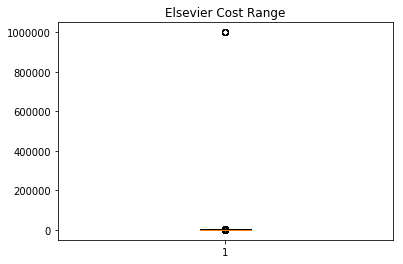

            index           Cost
count  408.000000     408.000000
mean   638.700980   26880.723701
std    120.384718  154440.963595
min    110.000000     348.330000
25%    537.750000    2168.965000
50%    639.500000    2351.795000
75%    741.250000    2475.452500
max    843.000000  999999.000000


In [0]:
#looking for outliers

plt.boxplot(elsevier['Cost'])
plt.title('Elsevier Cost Range')
plt.show()

print(elsevier.describe())

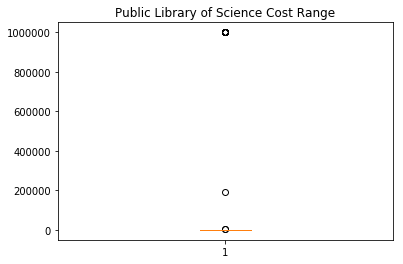

             index           Cost
count   307.000000     307.000000
mean   1461.788274   50551.879848
std      94.205367  215820.064964
min    1278.000000     122.310000
25%    1388.500000     877.090000
50%    1465.000000    1023.410000
75%    1541.500000    1446.805000
max    1618.000000  999999.000000


In [0]:
plt.boxplot(plos['Cost'])
plt.title('Public Library of Science Cost Range')
plt.show()

print(plos.describe())

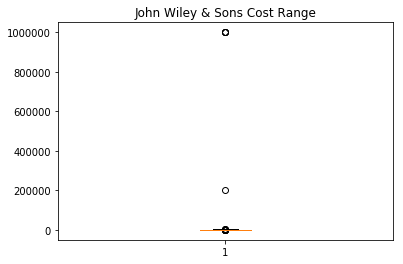

             index           Cost
count   270.000000     270.000000
mean   1889.151852   17532.888444
std     326.863527  121308.114848
min     251.000000     612.590000
25%    1912.250000    1835.307500
50%    1979.500000    2009.945000
75%    2046.750000    2310.950000
max    2114.000000  999999.000000


In [0]:
plt.boxplot(jws['Cost'])
plt.title('John Wiley & Sons Cost Range')
plt.show()

print(jws.describe())

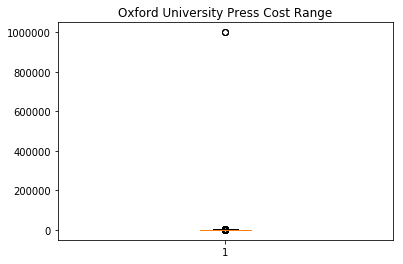

            index           Cost
count   167.00000     167.000000
mean   1192.00000   19775.350240
std      48.35287  132975.378101
min    1109.00000     378.780000
25%    1150.50000    1700.000000
50%    1192.00000    2040.000000
75%    1233.50000    2047.750000
max    1275.00000  999999.000000


In [0]:
plt.boxplot(oup['Cost'])
plt.title('Oxford University Press Cost Range')
plt.show()

print(oup.describe())

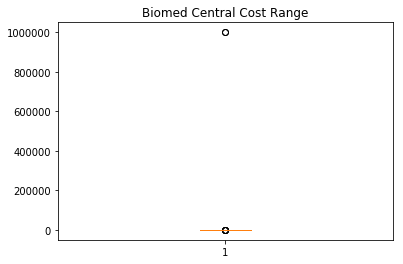

            index           Cost
count   95.000000      95.000000
mean   224.189474   22329.838250
std     30.422659  144133.380964
min    175.000000       9.930000
25%    198.500000    1190.400000
50%    222.000000    1314.600000
75%    253.500000    1536.000000
max    277.000000  999999.000000


In [0]:
plt.boxplot(bmc['Cost'])
plt.title('Biomed Central Cost Range')
plt.show()

print(bmc.describe())

In [0]:
#calculate the mean, median, and std without the outliers. Cutting off the calculation before the outlier value.
elsevier_mean = elsevier.loc[elsevier['Cost']<999999, 'Cost'].mean()
elsevier_median = elsevier.loc[elsevier['Cost']<999999, 'Cost'].median()
elsevier_std = elsevier.loc[elsevier['Cost']<999999, 'Cost'].std()

In [0]:
plos_mean = plos.loc[plos['Cost']<100000, 'Cost'].mean()
plos_median = plos.loc[plos['Cost']<100000, 'Cost'].median()
plos_std = plos.loc[plos['Cost']<100000, 'Cost'].std()

In [0]:
jws_mean = jws.loc[jws['Cost']<100000, 'Cost'].mean()
jws_median = jws.loc[jws['Cost']<100000, 'Cost'].median()
jws_std = jws.loc[jws['Cost']<100000, 'Cost'].std()

In [0]:
oup_mean = oup.loc[oup['Cost']<100000, 'Cost'].mean()
oup_median = oup.loc[oup['Cost']<100000, 'Cost'].median()
oup_std = oup.loc[oup['Cost']<100000, 'Cost'].std()

In [0]:
bmc_mean = bmc.loc[bmc['Cost']<100000, 'Cost'].mean()
bmc_median = bmc.loc[bmc['Cost']<100000, 'Cost'].median()
bmc_std = bmc.loc[bmc['Cost']<100000, 'Cost'].std()

In [0]:
print('Elsevier cost mean: £', round(elsevier_mean, 2), '\nElsevier cost median: £', round(elsevier_median, 2), '\nElsevier cost st. dev: £', round(elsevier_std, 2))
print('Public Library of Science mean: £', round(plos_mean, 2), '\nPublic Library of Science cost median: £', round(plos_median, 2), '\nPublic Library of Science cost st. dev: £', round(plos_std, 2))
print('John Wiley & Sons cost mean: £', round(jws_mean, 2), '\nJohn Wiley & Sons cost median: £', round(jws_median, 2), '\nJohn Wiley & Sons cost st. dev: £', round(jws_std, 2))
print('Oxford University Press cost mean: £', round(oup_mean, 2), '\nOxford University Press cost median: £', round(oup_median, 2), '\nOxford University Press cost st. dev: £', round(oup_std, 2))
print('Biomed Central cost mean: £', round(bmc_mean, 2), '\nBiomed Central cost median: £', round(bmc_median, 2), '\nBiomed Central cost st. dev: £', round(bmc_std, 2))


Elsevier cost mean: £ 2430.52 
Elsevier cost median: £ 2342.14 
Elsevier cost st. dev: £ 789.31
Public Library of Science mean: £ 1123.01 
Public Library of Science cost median: £ 1013.03 
Public Library of Science cost st. dev: £ 402.82
John Wiley & Sons cost mean: £ 2010.79 
John Wiley & Sons cost median: £ 2006.64 
John Wiley & Sons cost st. dev: £ 372.68
Oxford University Press cost mean: £ 1844.43 
Oxford University Press cost median: £ 2040.0 
Oxford University Press cost st. dev: £ 512.11
Biomed Central cost mean: £ 1304.69 
Biomed Central cost median: £ 1309.5 
Biomed Central cost st. dev: £ 350.68
